In [ ]:
# LogisticRegression on breast_cancer

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

cancerpd = pd.DataFrame(cancer.data, columns=cancer.feature_names)
target = pd.DataFrame(cancer.target)  
#diagnosis = pd.Categorical.from_codes(cancer.target, cancer.target_names)
#diagnosis = pd.get_dummies(diagnosis)

In [3]:
# Define the Functions 

In [2]:
# Create the Franke Function

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4
    
#z = FrankeFunction(x, y)


# Create the design matrix
#X= create_X(x, y, m)
    
def DesignMatriX(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)
    
    N = len(x)
    l = int((n+1) * (n+2)/2)  # Number of elements in beta
    X = np.ones((N,l))
    
    for i in range(1, n+1):
        q = int((i) * (i+1)/2)
        for k in range(i+1):
            X[:,q+k] = x**(i-k) * y**k
    
    return X

#X = DesignMatriX(x, z, m)

In [2]:
# Initialize the weights and bias
def initialize(m):    
    w = np.zeros((m,1)) + 0.0001
    b = 0.0    
    return w, b


# Calculate sigmoid of z
def sigmoid(z):
    return 1. / (1. + np.exp(-z))


# Forward and back propogation
def fb_propogate(X, y, w, b): 
    
    m = X.shape[1] # Number of training data
    
    # Forward Propogation, calculating the cost
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    cost= -(1. / m) * np.sum(y * np.log(A) + (1. - y) * np.log(1. - A))
    
    # Back Propogation , calculating the gradients
    dw = (1. / m)* np.dot(X, (A - y).T)   # derivative of weight
    db = (1. / m)* np.sum(A - y)          # derivative of bias
    
    grads= {'dw':dw, 'db':db}
    
    return grads, cost


# Performing Grdient Descent - updating/learing  η
def optimize(X, y, w, b, Niterations, eta):
    
    costs=[]
    
    for i in range(Niterations):
        
        grads, cost = fb_propogate(X, y, w, b)
        
        dw = grads["dw"]
        db = grads["db"]
        
        # update weight and bias by learning_rate=alpha
        w = w - eta * dw
        b = b - eta * db
        
        # Store the cost and display it at interval of every 100th iterations
        costs.append(cost)
        if i% 500 == 0:
            print("Cost after %i-th iteration : %f" %(i, cost))
        
    parameters = {"w":w, "b":b}
    grads = {"dw":dw, "db":db}
    
    return parameters, grads, costs


# Predictions on the data set (mapping probabilities to 0 or 1)
def predict(X, w, b):
    
    m = X.shape[1] # Number of training data
    
    y_predict = np.zeros((1, m))
    
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
        
    for i in range(A.shape[1]):
        
        if(A[0, i] < 0.5):
            y_predict[0, i] = 0
        else:
            y_predict[0, i] = 1
    
    return y_predict


# Calculating the Logistic Regression Model (train data)
def LR_model(X, y, Niterations, eta):
    
    m = X.shape[0] # Number of features
    
    w, b = initialize(m)
    
    parameters, grads, costs = optimize(X, y, w, b, Niterations, eta)
    
    w = parameters["w"]
    b = parameters["b"]
    
    d = {"w":w, "b":b, "costs": costs}
    
    return d


# Accuracy of the model
def accuracy(ytilde, y):
    return (np.mean(y == ytilde) * 100)


In [5]:
#############################################################
# Start the main program
#############################################################

(455, 30) (114, 30) (455,) (114,)
Cost after 0-th iteration : 0.710506
Cost after 500-th iteration : 0.523687
Cost after 1000-th iteration : 0.460363
Cost after 1500-th iteration : 0.421362
Cost after 2000-th iteration : 0.393762
Cost after 2500-th iteration : 0.372797
Cost after 3000-th iteration : 0.356191
Cost after 3500-th iteration : 0.342677
Cost after 4000-th iteration : 0.331469
Cost after 4500-th iteration : 0.322036
Cost after 5000-th iteration : 0.313998
Cost after 5500-th iteration : 0.307073
Cost after 6000-th iteration : 0.301049
Cost after 6500-th iteration : 0.295761
Cost after 7000-th iteration : 0.291083
Cost after 7500-th iteration : 0.286914
Cost after 8000-th iteration : 0.283174
Cost after 8500-th iteration : 0.279801
Cost after 9000-th iteration : 0.276741
Cost after 9500-th iteration : 0.273954


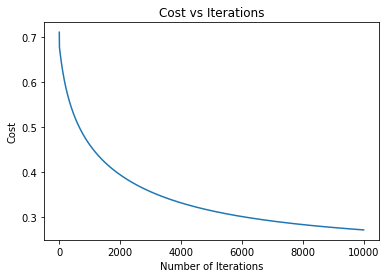


Train accuracy: 90.98901098901099 
Test accuracy:  95.6140350877193 


In [4]:
# Split data into train and test (80% and 20%)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Calling the model function to train a Logistic Regression Model on Training Data
d = LR_model(X_train.T, y_train.T, Niterations=10000, eta=0.000001)

costs = d["costs"]  # cost
w     = d["w"]      # weight
b     = d["b"]      # bias

# Plot the cost vs number_of_iterations graph
plt.plot(costs)
plt.title("Cost vs Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

# Calculate the accuracy on Training and Test Data
y_predict_train = predict(X_train.T, w, b)
y_predict_test  = predict(X_test.T, w, b)

print("\nTrain accuracy: {} ".format( accuracy(y_predict_train, y_train.T) ))
print("Test accuracy:  {} ".format( accuracy(y_predict_test, y_test.T) ))


In [8]:
#yy=np.concatenate((y_test.reshape(-1,1), y_predict_test.reshape(-1,1)), axis=1)
#print(yy)

In [9]:
############# scikit-learn implementation ###########

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state = 42,max_iter= 10000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
print("Train accuracy: {} ".format(model.score(X_train, y_train)*100))
print("Test accuracy:  {} ".format(model.score(X_test, y_test)*100))

Train accuracy: 95.6043956043956 
Test accuracy:  95.6140350877193 


In [19]:
#

In [12]:
# Scaled data /features
scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#